https://www.kaggle.com/code/ashinthm/data-visualization-using-mobile-prices-dataset?kernelSessionId=98590099

# Mobile Price Classification Data Visulaization

In data Science, we need to visualize the data to get a better picture of the various hidden relationships in it, and also to make decisions based on what it shows. The libraries being used here are __matplotlib and seaborn__. This notebook will cover a range of plots, apart from the common ones and more importantly , highlight the impact of the hyperparameters of the plots in data visualisation.

Using the mobile price classification dataset in kaggle as it has relatively less number of fields, and different types of data types in it.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
from numpy import median
from numpy import mean

In [3]:
data=pd.read_csv('../train.csv')

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
check_null= [col for col in data.columns if data[col].isnull().any()]
check_null

[]

We can see that there are no empty values in the data.

<AxesSubplot:>

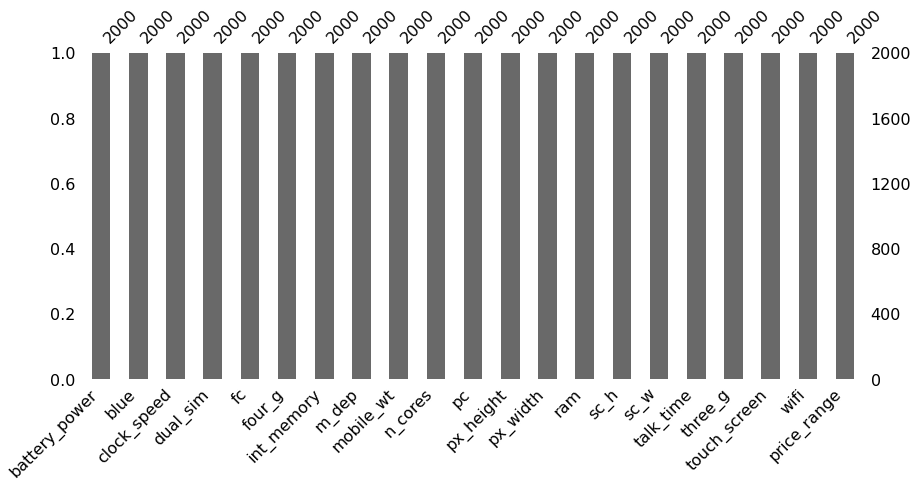

In [6]:
mno.bar(data,figsize=[14,6])

As these packages offer various different kinds of plots, we begin by looking at some of the most basic and common ones.

In [7]:
plt.style.available
#can be used to change chart style

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [8]:
#initializing here as it can be used in the palette parameter
color=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap','CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b','tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight','twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter','winter_r']

# 1. Linear Plot

## 1.a Matplotlib

Plotting by using a simple plot command, and the parameters are also quite self explanatory.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


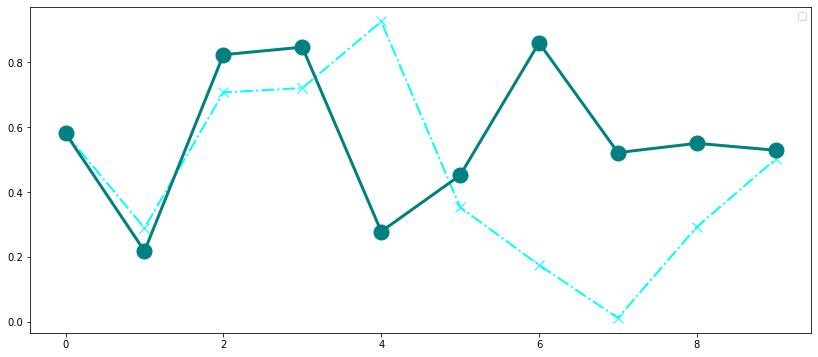

In [9]:
X=list(range(10))
Y=np.random.rand(10)
Z=np.random.rand(10)
plt.figure(figsize=[14,6])
plt.plot(X,Y,color='cyan',marker='x',linestyle='-.',linewidth=2,markersize=10)
plt.plot(X,Z,color='teal',marker='o',linestyle='-',linewidth=3,markersize=15)
plt.legend()
plt.show()

## 1.b Seaborn lineplot

<AxesSubplot:>

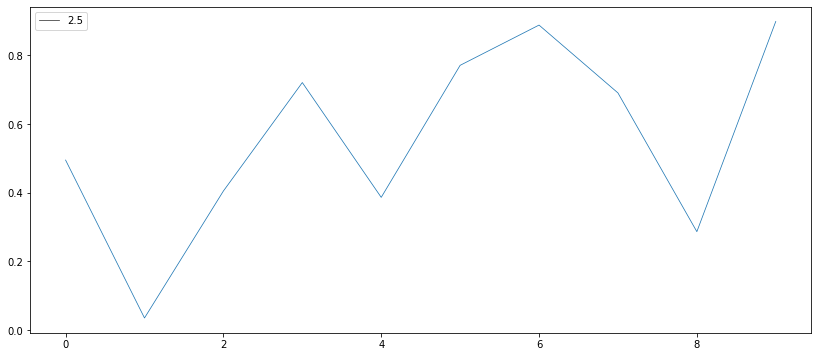

In [10]:
#taking two random arrays to illustrate the plot.
X=list(range(10))
Y=np.random.rand(10)
plt.figure(figsize=[14,6])
sns.lineplot(x=X,y=Y,size=2.5)

Here Clockspeed is a categorical variable. The variation being displayed in the shaded part and the line showing the mean value.  
With the hue parameter, we can compare the variation with respect to each category in the variable(__four_g__ in this instance).Also,with hue we can change the colors with __palette__  
Also in the below picture, three graphs showing how __size__ ,__style__ and __hue__ changes the scheme of the plot.  
Size is preferred if the column has categorical variables with numeric value.

<AxesSubplot:xlabel='mobile_wt', ylabel='clock_speed'>

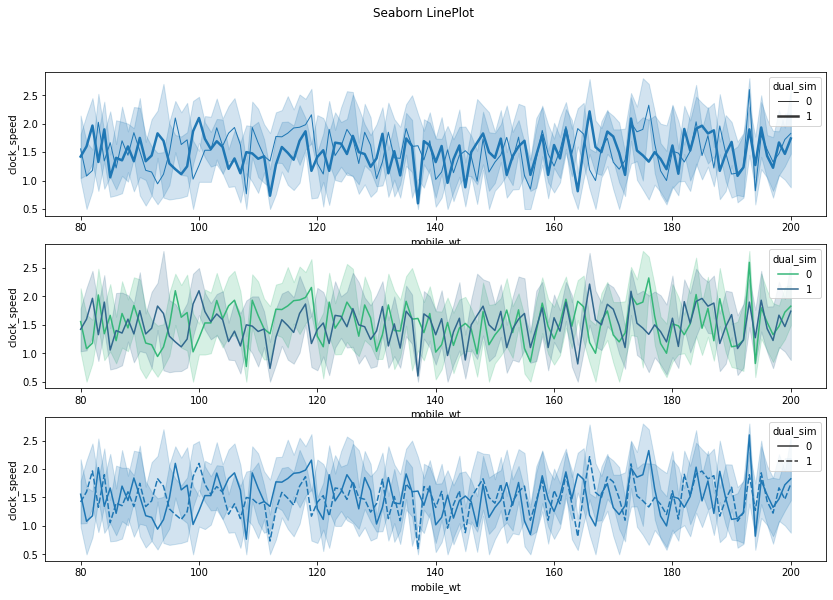

In [11]:
#taking from the data
plt.figure(figsize=[14,9])
plt.subplot(3,1,1)
sns.lineplot(x=data.mobile_wt,y=data.clock_speed,data=data,size='dual_sim',sizes=['1','2.5'])
plt.subplot(3,1,2)
val=np.random.randint(0,len(color))
sns.lineplot(x=data.mobile_wt,y=data.clock_speed,data=data,hue='dual_sim',palette=color[val])
plt.suptitle("Seaborn LinePlot")
plt.subplot(3,1,3)
sns.lineplot(x=data.mobile_wt,y=data.clock_speed,data=data,style='dual_sim')

In addition to this __hue__ and __style__ can be combined.  
__Markers__ are used to identify the data points.  
The dashed lines can be added or removed using the boolean __dashes__ parameter.

<AxesSubplot:xlabel='mobile_wt', ylabel='clock_speed'>

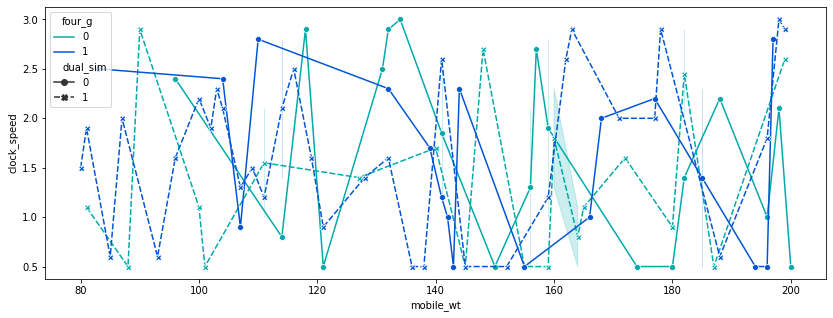

In [12]:
plt.figure(figsize=[14,5])
val=np.random.randint(0,len(color))
sns.lineplot(x=data.mobile_wt.iloc[:100],y=data.clock_speed.iloc[:100],data=data,hue='four_g',style='dual_sim',palette=color[val],markers=True,dashes=True)

The way variation is displayed can be configured , as *bars* or *band*

<AxesSubplot:xlabel='mobile_wt', ylabel='clock_speed'>

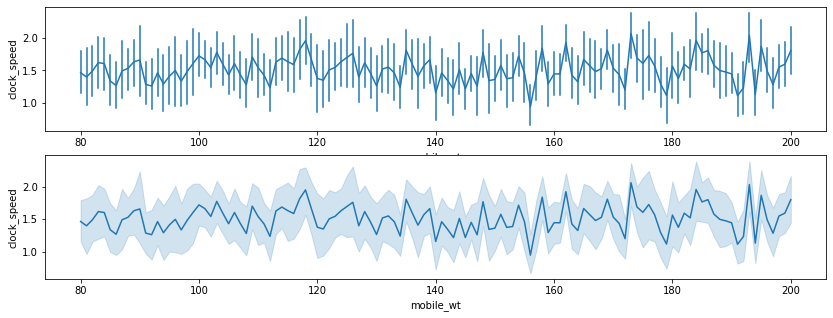

In [13]:
plt.figure(figsize=[14,5])
plt.subplot(2,1,1)
sns.lineplot(x=data.mobile_wt,y=data.clock_speed,data=data,err_style='bars')
plt.subplot(2,1,2)
sns.lineplot(x=data.mobile_wt,y=data.clock_speed,data=data,err_style='band')

# 2. Bar Plot


## 2.a Matplotlib

<BarContainer object of 8 artists>

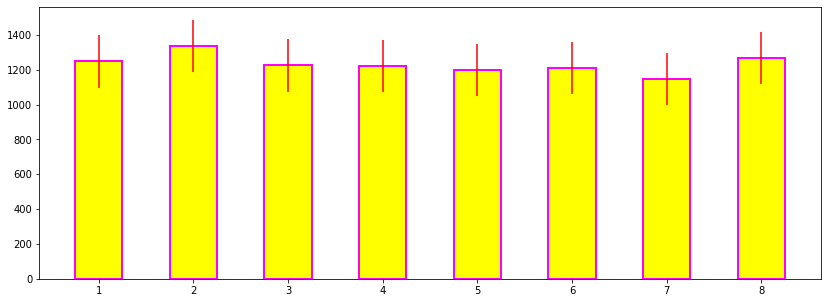

In [14]:
X=data.n_cores.unique()
Y=data.groupby('n_cores')['battery_power'].median()
plt.figure(figsize=[14,5])
plt.bar(X,Y,width=0.5,color='yellow',edgecolor='magenta',linewidth=2,yerr=150,ecolor='red')

The parameters being:-  
__width__ for the width of the bars   
__color__ to color the bar  
__edgecolor__ color of the edge of the bar  
__linewidth__ width of the edge  
__yerr__ being the error margin  
__ecolor__ being the color of the error line

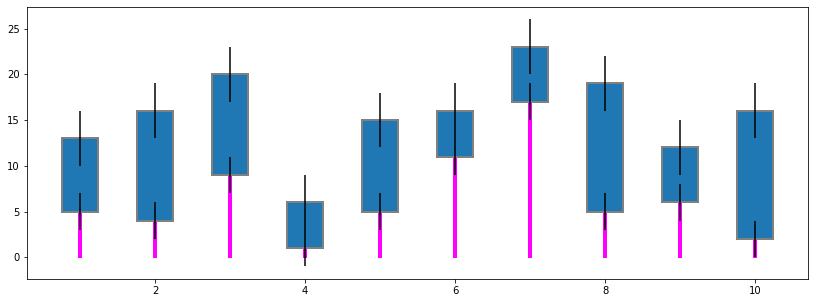

In [15]:
# stacking bar plots one above other
A=np.random.randint(low=1,high=20,size=10)
B=np.random.randint(low=5,high=15,size=10)
X=np.arange(1,11)
plt.figure(figsize=[14,5])
plt.bar(X,A,color='grey',edgecolor='magenta',linewidth=2,width=0.5*np.random.randn(),yerr=2)
plt.bar(X,B,bottom=A,edgecolor='grey',linewidth=2,width=0.5*np.random.randn(),yerr=3)
plt.show()
# these bars can be stacked over by using a for loop and inserting each column of  the dataset


Horizontal bar plot, most of the parameters being the same (can't seem to figure out how to stack.)

<BarContainer object of 10 artists>

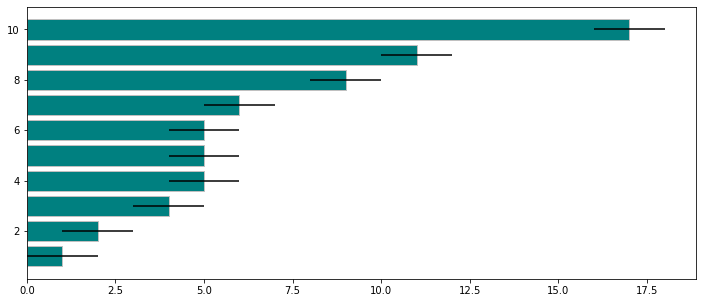

In [16]:
A.sort()
plt.figure(figsize=[12,5])
plt.barh(X,A,color='Teal',xerr=1,edgecolor='silver')

## 2b. Seaborn

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

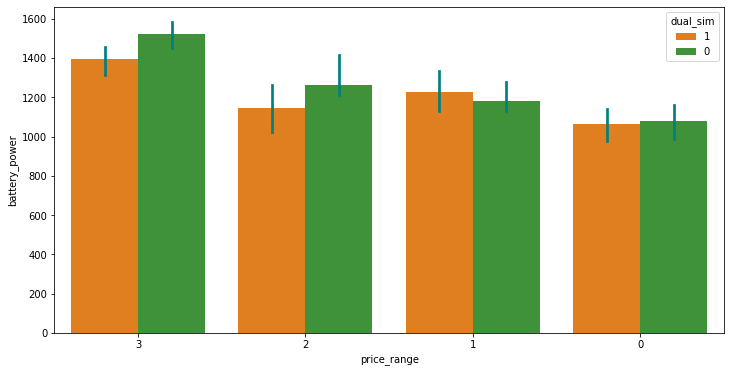

In [17]:
plt.figure(figsize=[12,6])
val=np.random.randint(0,len(color))
sns.barplot(x='price_range',y='battery_power',data=data,order=[3,2,1,0],hue='dual_sim',hue_order=[1,0],errcolor='teal',estimator=median,palette=color[val])
#ordering the x axis 

__dodge__ is a parameter which can be used for hue without changing the bar width  
__*Note*__ : hue_order can be used in lineplots as well, like all the plots where we can use hue.

Text(0.5, 1.0, 'Illustrating the different color schemes for palette parameter in seaborn')

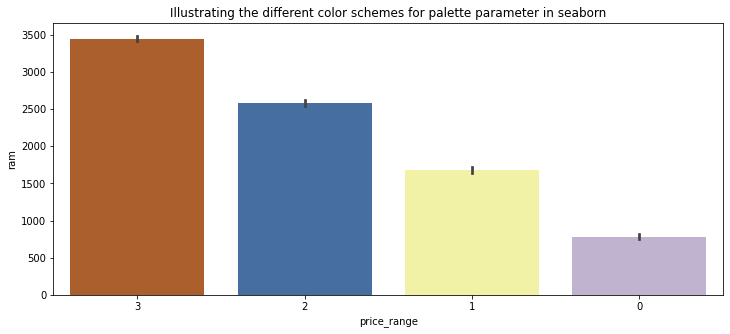

In [18]:
val=np.random.randint(0,len(color))
plt.figure(figsize=[12,5])
sns.barplot(x='price_range',y='ram',data=data,order=[3,2,1,0],palette=color[val])
plt.title("Illustrating the different color schemes for palette parameter in seaborn")

We can use _Catplot_ to group another additional variable.

<Figure size 1440x648 with 0 Axes>

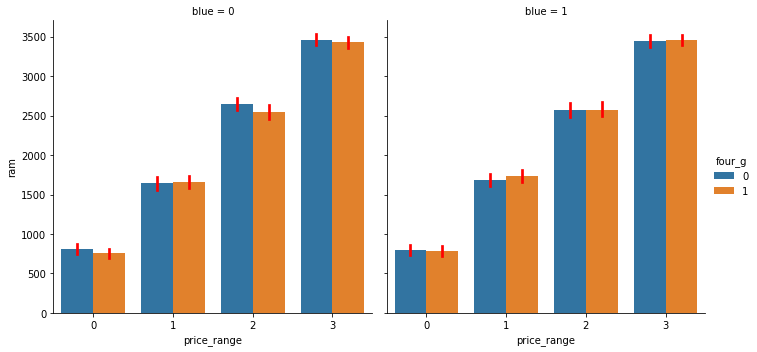

In [19]:
plt.figure(figsize=[20,9])
sns.catplot(x='price_range',y='ram',hue='four_g',col='blue',data=data,kind='bar',errcolor='red')

# 3. Pie chart

Seaborn does not offer pie charts, thus all the pie charts are made using matplotlib.

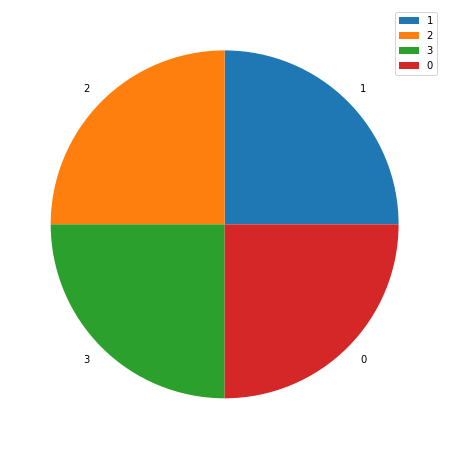

In [20]:
plt.figure(figsize=[8,8])
plt.pie(list(data.price_range.value_counts()),labels=data.price_range.unique())
plt.legend()
plt.show()

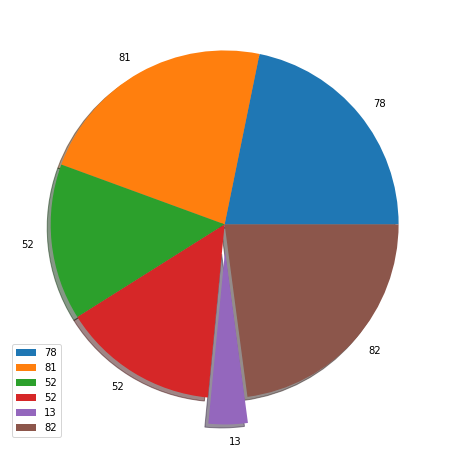

In [21]:
x=np.random.randint(0,100,6)
plt.figure(figsize=[8,8])
plt.pie(x=x,explode=[0,0,0,0,0.15,0],shadow=True,labels=x)
plt.legend()
plt.show()

# 4.Scatter Plot

## 4a. normal scatter plot

<AxesSubplot:xlabel='int_memory', ylabel='ram'>

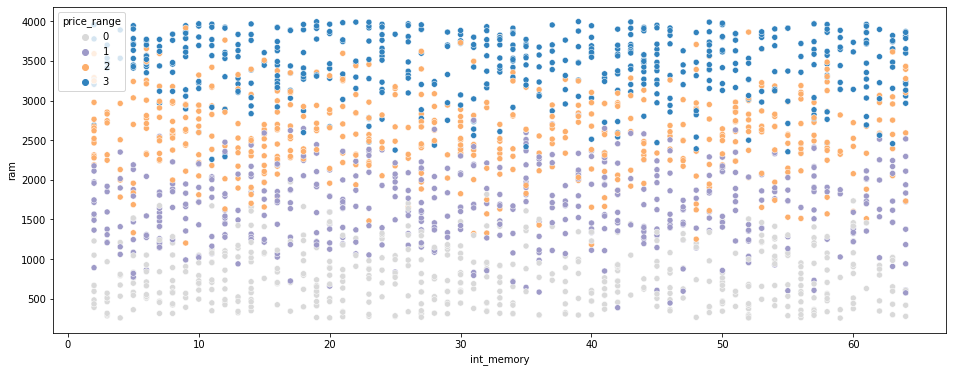

In [22]:
plt.figure(figsize=[16,6])
val=np.random.randint(0,len(color))
sns.scatterplot(x='int_memory',y='ram',data=data,hue='price_range',palette=color[val])

## 4b. Bubble plot

<AxesSubplot:xlabel='mobile_wt', ylabel='battery_power'>

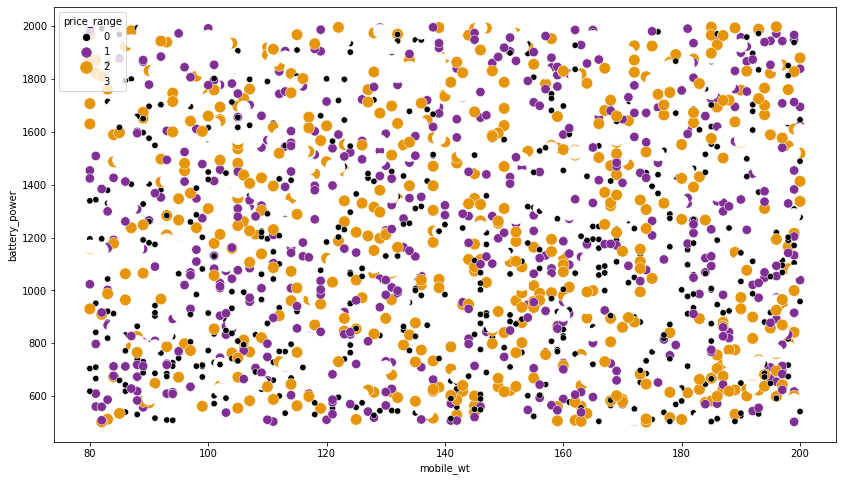

In [23]:
plt.figure(figsize=[14,8])
val=np.random.randint(0,len(color))
sns.scatterplot(x='mobile_wt',y='battery_power',data=data,hue='price_range',size='price_range',sizes=(40,180),palette=color[val])

## 4c. Regplot,swarmplot, lmplot

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

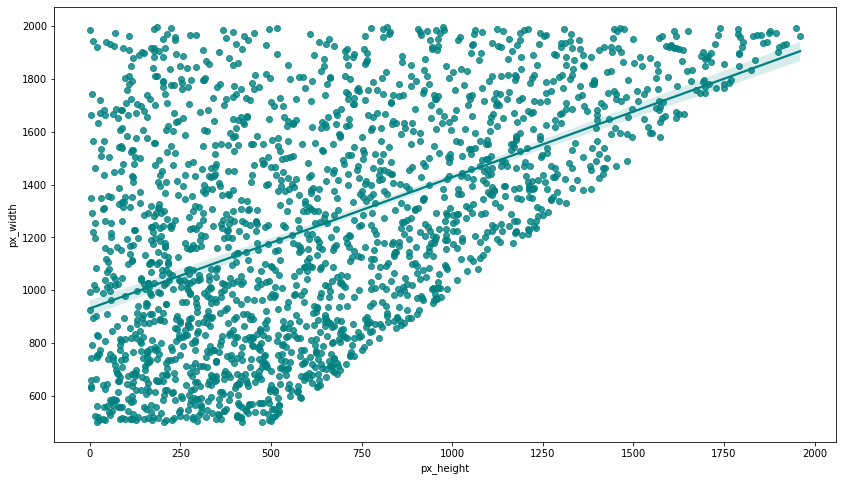

In [24]:
plt.figure(figsize=[14,8])
sns.regplot(x='px_height',y='px_width',data=data,color='teal')
# color take the same values as in matplotlib

In this plot if we want to differentiate, suppose the phone dimensions with the price class.  
we can use __lmplot__

<Figure size 1008x576 with 0 Axes>

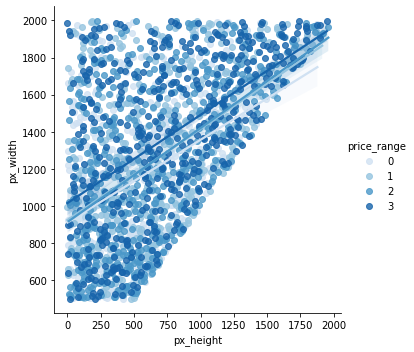

In [25]:
plt.figure(figsize=[14,8])
sns.lmplot(x='px_height',y='px_width',data=data,hue='price_range',palette='Blues')

<Figure size 1008x576 with 0 Axes>

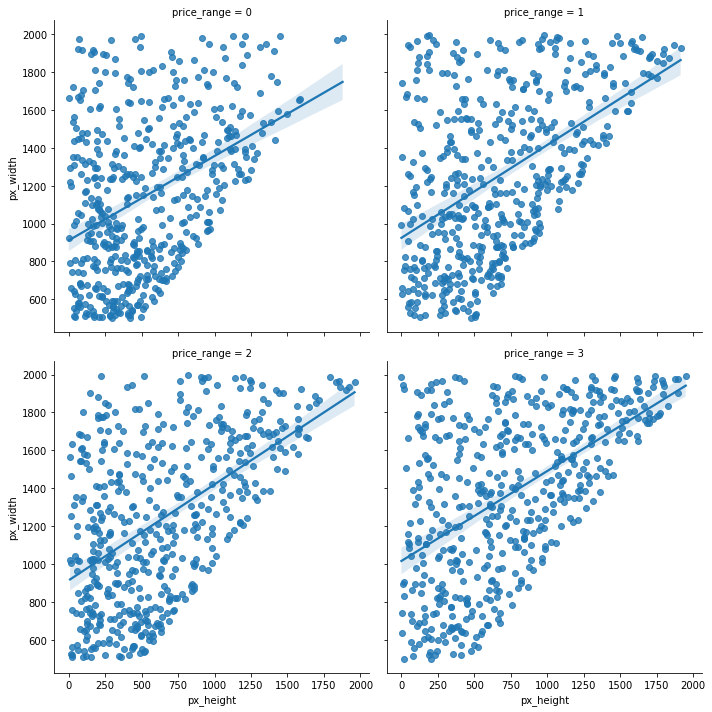

In [26]:
plt.figure(figsize=[14,8])
sns.lmplot(x='px_height',y='px_width',data=data,col='price_range',col_wrap=2,)
plt.show()

here __col__ takes the points of that particular category and produces a separate regplot  
__col_wrap__ can be used to change the format of the subplots. (2x2, 4x1....)

with __row__ and __col__ we now bring in two parameters and find the regplot of the models that come under each of it's categories.

<Figure size 1008x576 with 0 Axes>

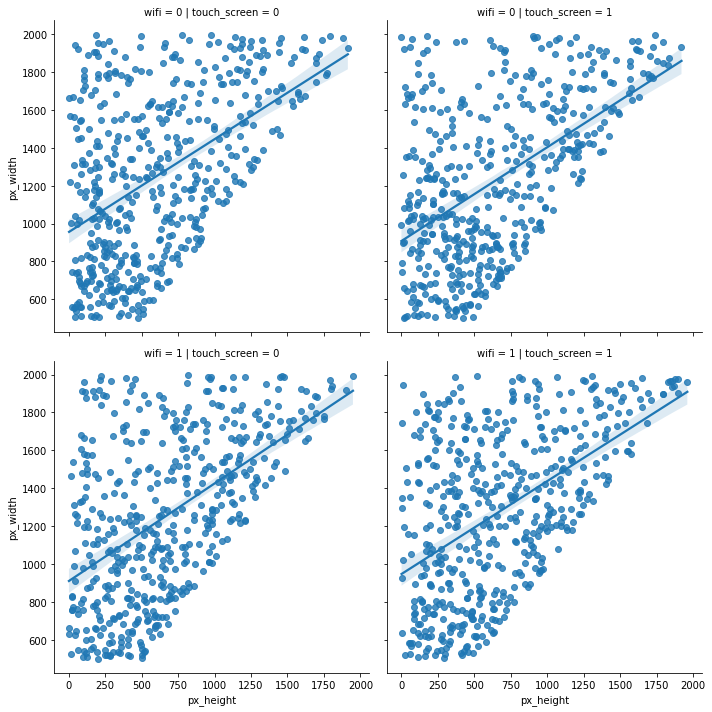

In [27]:
plt.figure(figsize=[14,8])
sns.lmplot(x='px_height',y='px_width',data=data,row='wifi',col='touch_screen')

Swarm plot is basically a scatter plot, with the categorical variable in the x-axis.

Text(0.5, 1.0, 'variation of battery size of different mobiles')

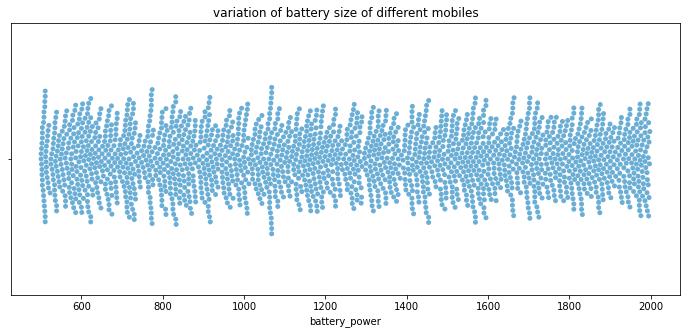

In [28]:
plt.figure(figsize=[12,5])
sns.swarmplot(x=data['battery_power'],palette='Blues')
plt.title("variation of battery size of different mobiles")

<AxesSubplot:xlabel='touch_screen', ylabel='battery_power'>

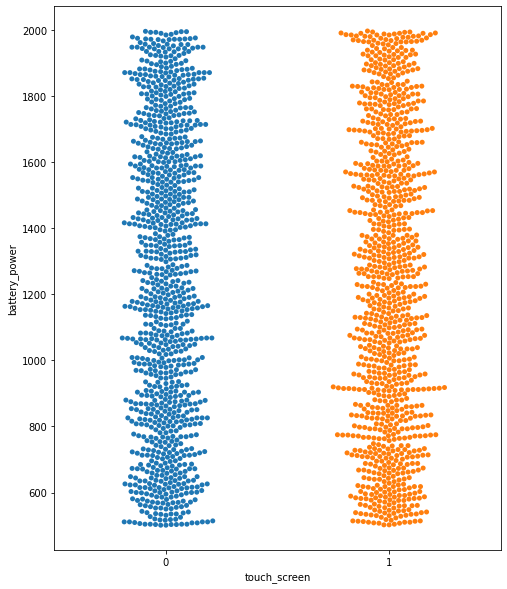

In [29]:
plt.figure(figsize=[8,10])
sns.swarmplot(y='battery_power',x='touch_screen',data=data)
# swap the columns in x,y parameters would make it vertical.

In the below plot __dodge__ is used to separate the categories in the hue column

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

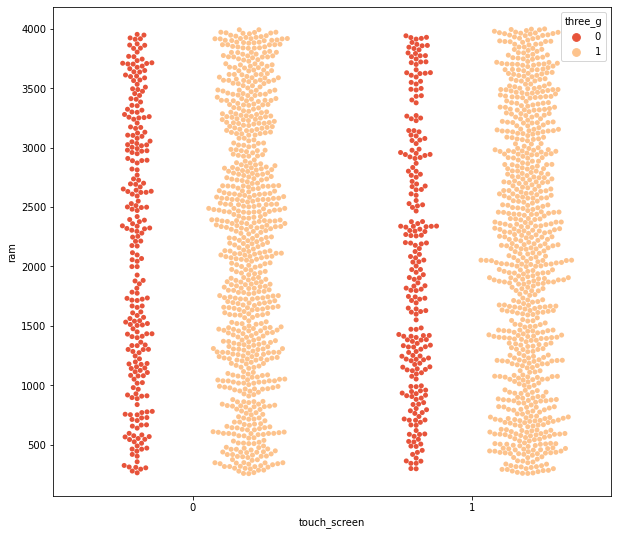

In [30]:
plt.figure(figsize=[10,9])
val= np.random.randint(0,len(color))
sns.swarmplot(x='touch_screen',y='ram',hue='three_g',data=data,palette=color[val],dodge=True)

Making a __*catplot*__ is a very good way to represent swarmplots

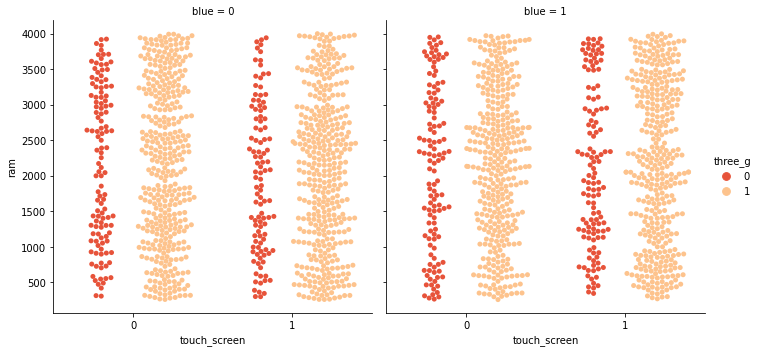

In [31]:
sns.catplot(x='touch_screen',y='ram',hue='three_g',data=data,palette=color[val],col='blue',kind='swarm',dodge=True)

# 5. HeatMap

It can explain the distribution of values over two parameters, the input data has to be a numeric matrix.

In [32]:
flights=sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<AxesSubplot:xlabel='month', ylabel='year'>

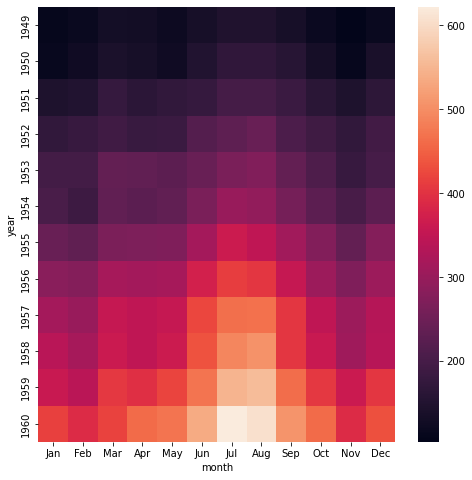

In [33]:
flights=flights.pivot('year','month','passengers')
plt.figure(figsize=[8,8])
sns.heatmap(flights)

<AxesSubplot:xlabel='month', ylabel='year'>

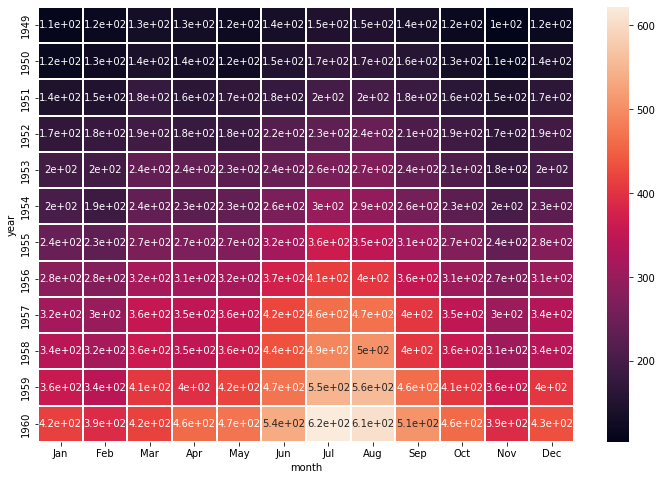

In [34]:
plt.figure(figsize=[12,8])
sns.heatmap(flights,annot=True,linewidths=0.05)

__center__: plotting heatmap with the color bar centered at value 0  
__cmap__ : colour map

# 6. Distributions

## 6.a Distplot

c:\Users\Liore\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


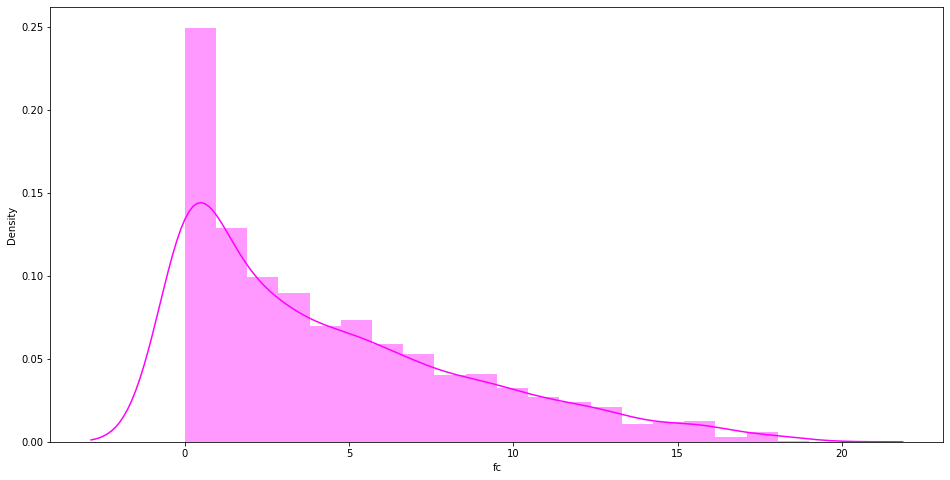

In [35]:
plt.figure(figsize=[16,8])
sns.distplot(data.fc,color='magenta')
plt.show()

Some of it's parameters:-  
__kde__(bool): can enable/remove the density cure  
__hist__(bool): can enable/remove the histogram bars  
__vertical__(bool): if it's true, the  the plot will be horizontal.
__color__ : colour of the plot

## 6.b Kde plot

<AxesSubplot:xlabel='fc', ylabel='Density'>

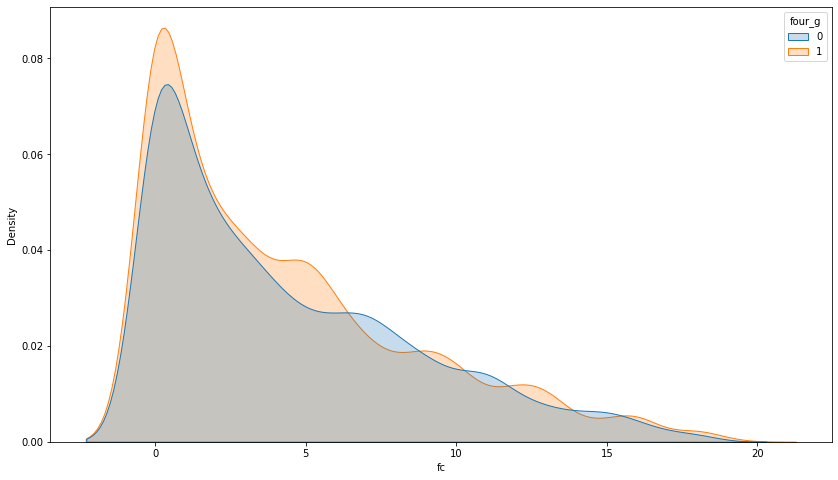

In [36]:
plt.figure(figsize=[14,8])
sns.kdeplot(data=data,x=data.fc,bw_adjust=0.7,hue=data.four_g,fill=True)
# if rather than x, we put y then we get a horizontal kde plot

__bw_adjust__ : parameter for smoothening the curve  
__cumulative__(bool) : makes the distribuiton into a cumulative one  
__log_scale__(bool) : x axis becomes a log scale  
__fill__(bool) : fills the distribution area


### Bivariate distribution

<AxesSubplot:xlabel='int_memory', ylabel='n_cores'>

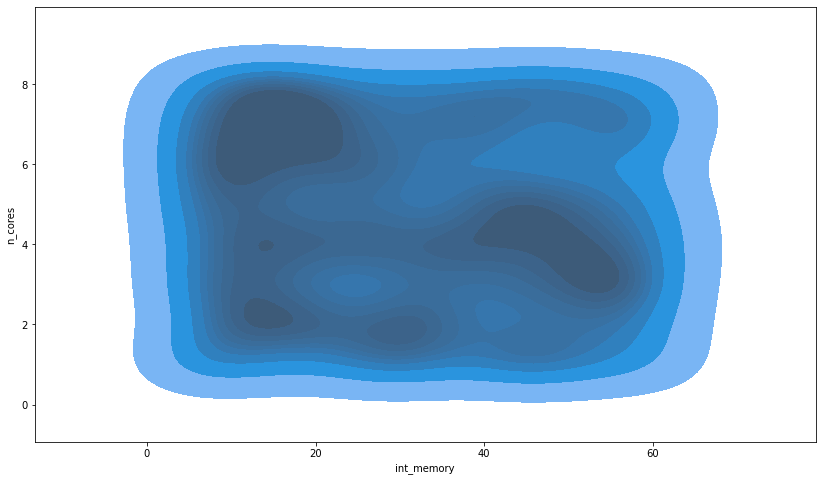

In [37]:
plt.figure(figsize=[14,8])
sns.kdeplot(data=data,x=data.int_memory,y=data.n_cores,fill=True)

__levels__: can be used to reduce or increase the levels of distribution.

# 7. Boxplot

<AxesSubplot:xlabel='blue', ylabel='battery_power'>

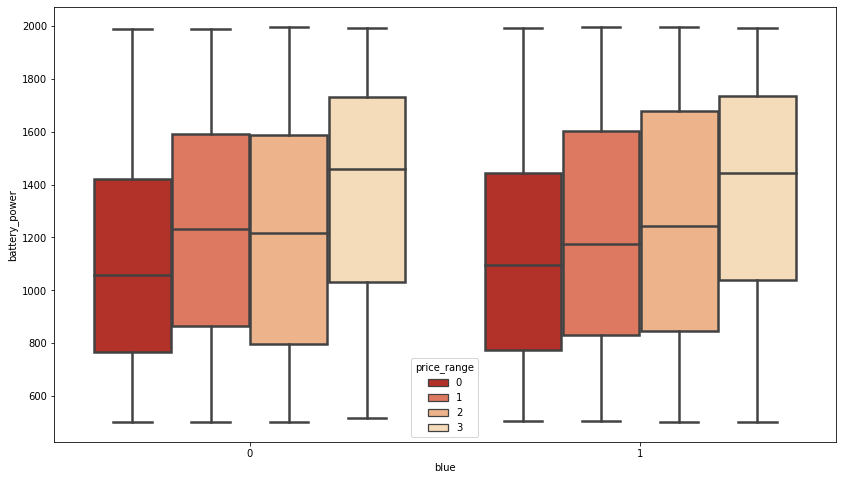

In [38]:
plt.figure(figsize=[14,8])
sns.boxplot(y=data.battery_power,x='blue',hue='price_range',data=data,palette=color[val],linewidth=2.5)

Adding a swarm plot over box plot

<AxesSubplot:xlabel='four_g', ylabel='battery_power'>

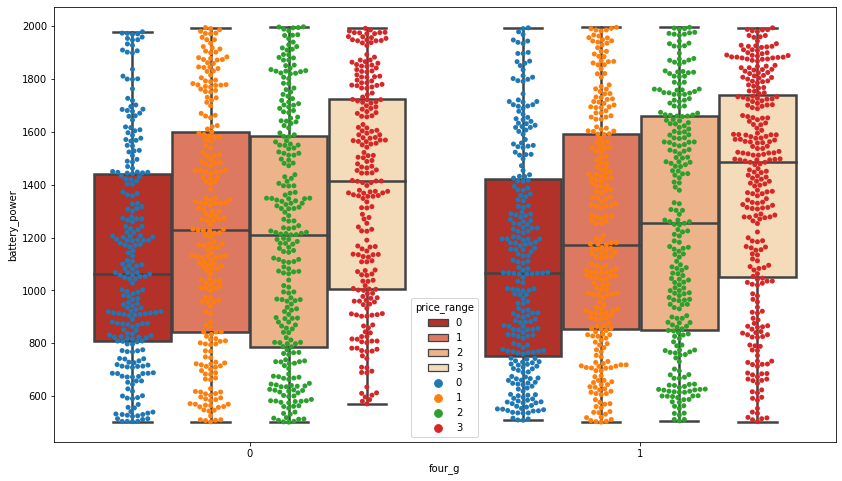

In [39]:
plt.figure(figsize=[14,8])
sns.boxplot(y=data.battery_power,x='four_g',hue='price_range',data=data,palette=color[val],linewidth=2.5)
sns.swarmplot(y=data.battery_power,x='four_g',hue='price_range',data=data,dodge=True)

Can use box plots for catplot as well

<Figure size 1008x864 with 0 Axes>

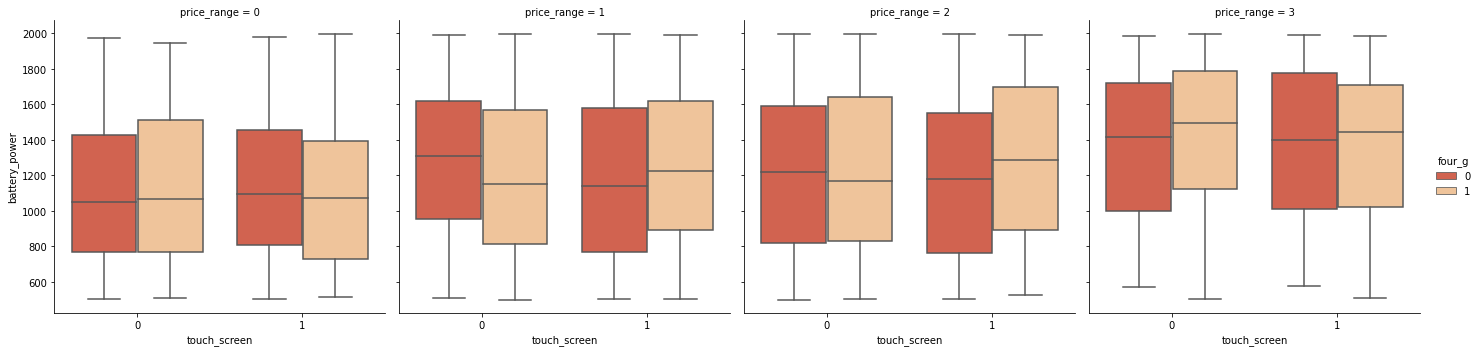

In [40]:
plt.figure(figsize=[14,12])
sns.catplot(x='touch_screen',y='battery_power',data=data,kind='box',col='price_range',hue='four_g',palette=color[val])
plt.show()